# 종합실습1 단변량 분석

# 1.비즈니스 시나리오

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
    * 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
        * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
        * 너무 국내 시장에 집중됨.
        * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
    * 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.

* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
    * 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
    * 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
    * 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


# 2.환경준비

## (1) 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩 : 카시트 판매량 데이터

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


# 3.단변량분석 : 숫자형 변수

## (1) Sales (Target) 

In [3]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량(수치화)

In [4]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

3) 분포 확인(시각화)

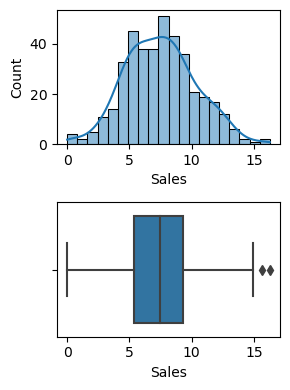

In [11]:
plt.figure(figsize = (3, 4))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde = True)

plt.subplot(2,1,2)
sns.boxplot(x = data[var])

plt.tight_layout()
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

5) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

In [17]:
def analysis_unit(data, var, bins = 30, kde = True):
    display(data[[var]].describe().T)
    
    plt.figure(figsize = (3, 4))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = kde)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()

    plt.tight_layout()
    plt.show()

## (2) CompPrice

1) 변수의 비즈니스 의미

    경쟁사 가격(단위: 달러)
    비슷한 스펙의 제품인 경우, 경쟁사의 가격과 자사의 가격의 차이점을 파악

2) 기초통계량(수치화)
3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


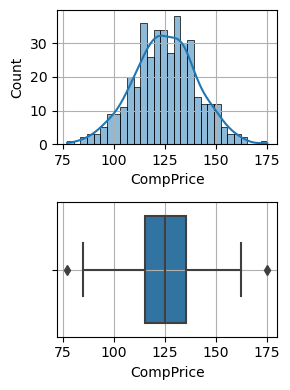

In [18]:
analysis_unit(data, 'CompPrice')

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

    상품의 50%의 가격이 115~135달러에 형성돼 있다.
    저가 또는 고가의 제품을 판매하는 제품보다는 적당한 가격대의 제품들이 주를 이루고 있다.

5) 추가 분석해 볼 사항이 있나요?

    자사 제품의 가격 형성에 대해서 파악할 필요가 있다.

## (3) Income

1) 변수의 비즈니스 의미

    지역 평균 소득(1000달러)
    지역 평균 소득에 따라서 구매력이 달라질 수 있다.

2) 기초통계량(수치화)
3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


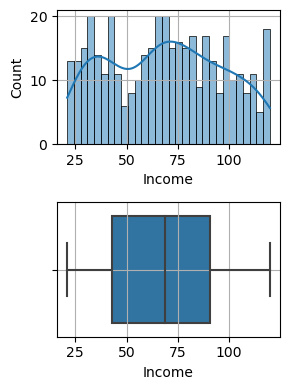

In [19]:
analysis_unit(data, 'Income')

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

    소득 수준은 너무 빈곤하지도, 너무 부유하지도 않다.
    모든 소득 구간에서 일정한 비율을 보인다.

5) 추가 분석해 볼 사항이 있나요?

## (4) Advertising

1) 변수의 비즈니스 의미

    각 지역, 회사의 광고 예산(단위: 1000달러)
    광고에 사용하는 예산과 판매량과의 연관성은 무엇인가?

2) 기초통계량(수치화)
3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


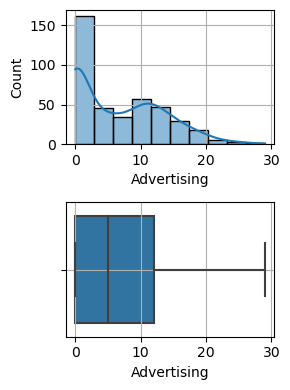

In [22]:
analysis_unit(data, 'Advertising', bins = 10)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

    광고를 한 번도 하지 않거나 5번 이내로 한 지역이 상당비율을 차지 한다.

5) 추가 분석해 볼 사항이 있나요?

    히스토그램을 좀 더 세분화 해서 파악할 필요가 있다.

,count,mean,std,min,25%,50%,75%,max
Advertising,256.0,10.367188,5.509879,1.0,6.0,10.0,14.0,29.0


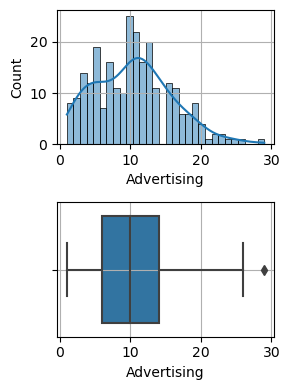

In [43]:
tmp = data.loc[data['Advertising'] > 0]
analysis_unit(tmp, 'Advertising', 30)

## (5) Population

1) 변수의 비즈니스 의미

    지역 인구수(단위, 1000명)
    지역의 인구수가 많고 적은 것이 판매량에 어떻게 영향을 미치느냐?

2) 기초통계량(수치화)
3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Population,400.0,264.84,147.376436,10.0,139.0,272.0,398.5,509.0


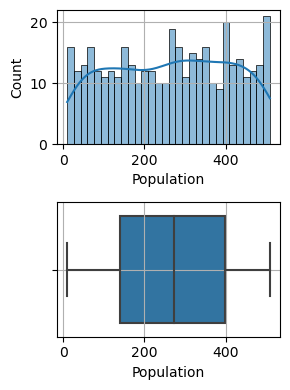

In [23]:
analysis_unit(data, 'Population')

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

    매장이 위치한 지역별 인구수는 비슷하다.
    균등 분포가 된 것으로 보아 조사 대상이 제한적으로 선택된 것일 수 있다.
    인구수에 의한 지역별 판매량은 크게 차이가 없을 것이다.

5) 추가 분석해 볼 사항이 있나요?

## (6) Price

1) 변수의 비즈니스 의미

    자사 지역별 판매 가격
    지역에 따라 판매 가격이 상이한지 파악해야 한다.

2) 기초통계량(수치화)
3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Price,400.0,115.795,23.676664,24.0,100.0,117.0,131.0,191.0


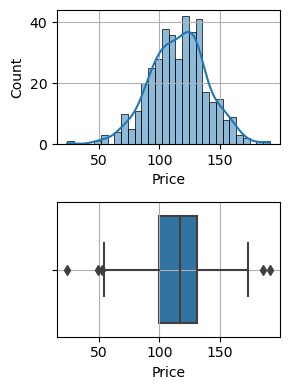

In [24]:
analysis_unit(data, 'Price')

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

    50%의 지역에서 100~131달러로 판매되고 있다.
    가격이 다양하지 못함이 제품의 다양성이 부족한 것은 아닌가?

5) 추가 분석해 볼 사항이 있나요?

    150달러 근처에서 판매되는 지역은 어디인가?
    왜 가격대 범위가 타사에 비해 넓은가?


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


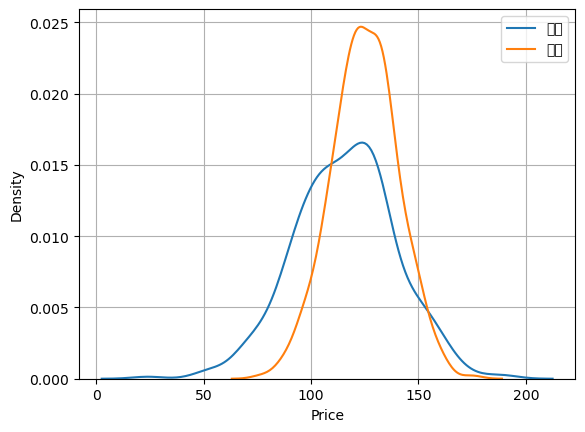

In [42]:
sns.kdeplot(x = 'Price', data = data, label = '자사', format = )
sns.kdeplot(x = 'CompPrice', data = data, label = '타사')

plt.legend()
plt.grid()
plt.show()

## (7) Age

1) 변수의 비즈니스 의미

    지역 인구의 평균 연령

2) 기초통계량(수치화)
3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Age,400.0,53.3225,16.200297,25.0,39.75,54.5,66.0,80.0


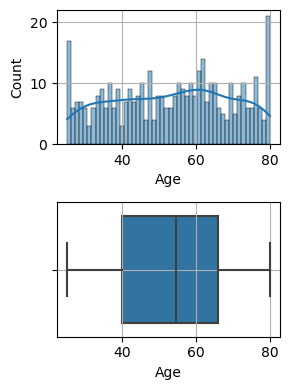

In [55]:
analysis_unit(data, 'Age', bins = 50)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

    지역 인구의 50%가 40-66세이다.
    어린 연령대가 적어서, 구매력이 떨어지는 것은 아닌가?
    지역 연령이 아니라, 구매자의 연령이 아닌가?

5) 추가 분석해 볼 사항이 있나요?

    연령대를 잘라보면 어떨까?

,count,mean,std,min,25%,50%,75%,max
Age,100.0,31.81,4.516401,25.0,28.0,32.0,35.25,39.0


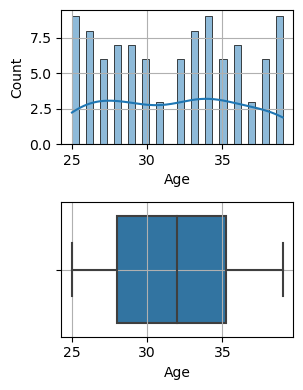

,count,mean,std,min,25%,50%,75%,max
Age,137.0,49.656934,5.661321,40.0,45.0,50.0,55.0,59.0


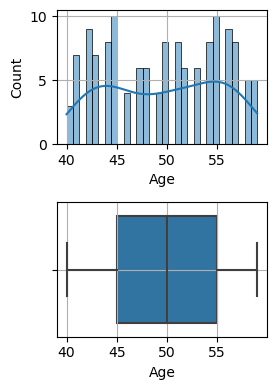

In [58]:
tmp = data.loc[data['Age'] < 40]
analysis_unit(tmp, 'Age')

tmp2 = data.loc[(data['Age'] >= 40) & (data['Age'] < 60)]
analysis_unit(tmp2, 'Age')

# 4.단변량분석 : 범주형 변수

## (1) ShelveLoc

In [26]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 기초통계량(수치화)

In [27]:
# 범주별 빈도수
data[var].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [28]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64

3) 분포 확인(시각화)

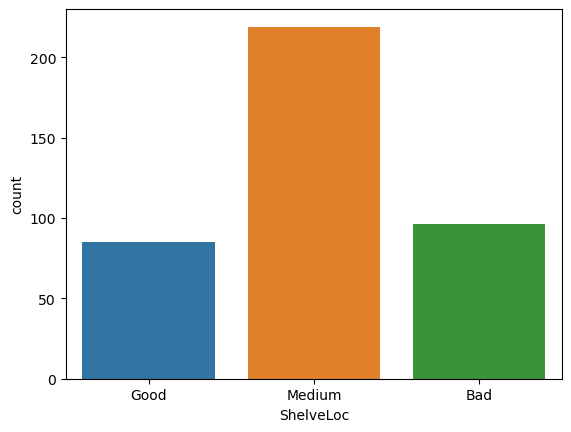

In [16]:
sns.countplot(x = data[var], order = ['Good','Medium','Bad'])
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 중간 정도 가 54%

5) 추가 분석해 볼 사항이 있나요?

* 진열상태에 따른 판매량 차이
* 지역, 인구수와 진열 상태 관계 비교

In [50]:
def analysis_range(data, var, order = ['Yes', 'No']):
    # 범주별 빈도수
    tmp1 = pd.DataFrame(data[var].value_counts())
    # 범주별 비율
    tmp2 = pd.DataFrame(data[var].value_counts() / data[var].shape[0])
    
    display(tmp1.T)
    display(tmp2.T)

    sns.countplot(x = data[var], order = ['Yes','No'])
    plt.show()


## (2) Urban

1) 변수의 비즈니스 의미

    도심 지역 여부(Yes, No)
    도심이냐 아니냐에 따라 판매량의 차이가 있냐?

2) 기초통계량(수치화)
3) 분포 확인(시각화)

,Yes,No
Urban,282,118


,Yes,No
Urban,0.705,0.295


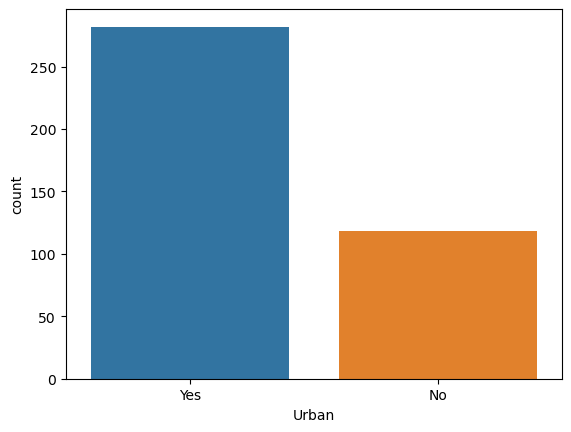

In [51]:
analysis_range(data, 'Urban')

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

    대부분의 매장이 도심 지역에 있다.
    구매가 도심에서 이루어질 가능성이 더 높다.

5) 추가 분석해 볼 사항이 있나요?

    도심인지 아닌지에 따라 판매량의 차이가 있느냐?

## (3) US

1) 변수의 비즈니스 의미

    매장이 미국에 있는지 여부(Yes, No)
    매장이 미국에만 있는 것이 판매량 증대를 제한하는 요소인가?

2) 기초통계량(수치화)
3) 분포 확인(시각화)

,Yes,No
US,258,142


,Yes,No
US,0.645,0.355


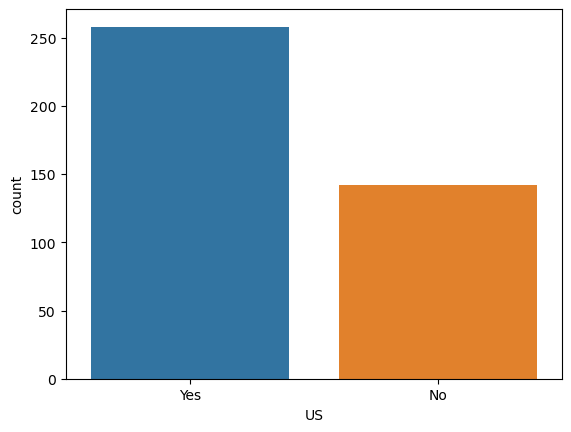

In [52]:
analysis_range(data, 'US')

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

    64.5%의 매장이 미국에 위치해 있다.

5) 추가 분석해 볼 사항이 있나요?

    국내와 해외 매장의 판매량은 어떻게 다른가?